### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

<h1 style="font-size: 14pt; color: black; font-weight: bold;">Data Visualization and Forecasting for Data Engineering Project</h1>

<h1 style="font-size: 12pt; color: blue; font-weight: bold;">Overview:</h1>

Four tables were created using Mockaroo:
- Customers:
    customer_id primary key 
    first_name 
    last_name
    email 
    created_at
    
- Orders:
    order_id primary key
    customer-id
    order_date DATE
    total_amount
    
- Products: 

- Payments: 

<h1 style="font-size: 12pt; color: blue; font-weight: bold;"> Objectives:</h1>

1) Pre-requistes:
    a) Upload ADW Wallet to terminal by copying from Object Storage
    b) Check for internet connectivity 
    c) install neccessary packages
2) Connect to ADW using python SDK and establish wallet credentials
3) Upload tables as dataframes using pandas 
4) Exploratory Data Analysis including summary statistics to determine null values and summary histograms
5) Sales Forecasting 

<h1 style="font-size: 12pt; color: blue; font-weight: bold;"> Documentation:</h1>


Connecting to ADW and Object Storage: https://accelerated-data-science.readthedocs.io/en/latest/user_guide/loading_data/connect.html 

pandas library: https://pandas.pydata.org/docs/user_guide/10min.html#viewing-data

matplotlib for summary stats: https://matplotlib.org/stable/plot_types/stats/hist_plot.html

seaborn for visualizations: https://seaborn.pydata.org/tutorial/distributions.html



In [72]:
# install oracle libraries to connect to ADW
!pip install cx_Oracle
!pip install oracle-ads

# install python packages for data analysis/visualization and summary statistics
!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install statsmodels



In [35]:
#confirm versions
print("cx_Oracle version:", cx_Oracle.__version__)
print("pandas version:", pd.__version__)

cx_Oracle version: 8.3.0
pandas version: 2.0.3


In [120]:
# neccessary imports 

# pandas for data manipulation
import pandas as pd

# numpy for mathematical calculations
import numpy as np 

# matplotlib and seaborn for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

# imports for wallet file and connecting ADW
import zipfile
import os
import cx_Oracle

# accelerated data science package used to store OCI tables as dataframe
import ads

# request to verify internet connection
import requests

In [37]:
# Check Internet Connection
try:
    response = requests.get("https://oracle.com")
    response.raise_for_status()  # Raises an HTTPError for bad responses
    print("Internet connection successful")
    print(response)
except requests.exceptions.RequestException as e:
    print(f"Internet connection failed: {e}")

Internet connection successful
<Response [200]>


In [128]:
# Establish Conection Parameters for ADW 
connection_parameters = {
    "user_name": "ADMIN",
    "password": "FuzzyTelegram123*",
    "service_name": "dep_high",
    "wallet_location": "/home/datascience/wallet",
}


# simple read of a SQL query into a dataframe
customers = pd.DataFrame.ads.read_sql(
    "SELECT * FROM customers",
    connection_parameters=connection_parameters,
)

orders = pd.DataFrame.ads.read_sql(
    "SELECT * FROM orders",
    connection_parameters=connection_parameters,
)

payments = pd.DataFrame.ads.read_sql(
    "SELECT * FROM payments",
    connection_parameters=connection_parameters,
)

products = pd.DataFrame.ads.read_sql(
    "SELECT * FROM products",
    connection_parameters=connection_parameters,
)

# print column names, Dtype and non-null counts to verify no missing values
print(customers.info())
print(orders.info())
print(payments.info())
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUSTOMER_ID  990 non-null    int64         
 1   FIRST_NAME   990 non-null    object        
 2   LAST_NAME    990 non-null    object        
 3   EMAIL        990 non-null    object        
 4   CREATED_AT   990 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ORDER_ID      610 non-null    int64         
 1   CUSTOMER_ID   610 non-null    int64         
 2   ORDER_DATE    610 non-null    datetime64[ns]
 3   TOTAL_AMOUNT  610 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 19.2 KB
None

In [106]:
# use .describe to get summary statistics 
customers.describe()

,CUSTOMER_ID,CREATED_AT
count,990.000000,990
mean,505.500000,2024-03-10 02:58:54.545454592
min,11.000000,2023-09-13 00:00:00
25%,258.250000,2023-12-08 00:00:00
50%,505.500000,2024-03-09 00:00:00
75%,752.750000,2024-06-09 00:00:00
max,1000.000000,2024-09-12 00:00:00
std,285.932684,NaN


In [102]:
orders.describe()

,ORDER_ID,CUSTOMER_ID,ORDER_DATE,TOTAL_AMOUNT,ORDER_MONTH
count,610.000000,610.000000,610,610.000000,610.000000
mean,2494.096721,412.332787,2025-03-25 19:26:09.836065536,5098.732508,6.639344
min,2001.000000,11.000000,2024-10-01 00:00:00,19.620000,1.000000
25%,2239.250000,172.250000,2024-12-19 06:00:00,2666.542500,4.000000
50%,2498.000000,368.000000,2025-03-21 12:00:00,5095.500000,7.000000
75%,2747.750000,618.750000,2025-06-22 18:00:00,7439.437500,10.000000
max,2997.000000,999.000000,2025-09-29 00:00:00,9989.910000,12.000000
std,287.394613,276.960264,NaN,2854.194406,3.459514


In [104]:
payments.describe()

,PAYMENT_ID,ORDER_ID,AMOUNT,PAYMENT_DATE
count,619.000000,619.000000,619.000000,619
mean,506.667205,2491.491115,4941.999790,2025-04-05 16:54:16.865912832
min,13.000000,2001.000000,35.210000,2024-10-01 00:00:00
25%,268.000000,2246.000000,2481.835000,2025-01-04 00:00:00
50%,505.000000,2485.000000,4860.100000,2025-04-07 00:00:00
75%,757.500000,2737.500000,7376.810000,2025-07-07 00:00:00
max,995.000000,2995.000000,9993.130000,2025-09-29 00:00:00
std,284.801195,279.466652,2893.417305,NaN


In [105]:
products.describe()

,PRODUCT_ID,PRICE
count,990.000000,990.000000
mean,505.500000,28.078596
std,285.932684,15.037759
min,11.000000,2.210000
25%,258.250000,15.162500
50%,505.500000,27.500000
75%,752.750000,40.725000
max,1000.000000,54.990000


In [109]:
# merge dataframes for orders, customers on customer_id
orders_customers = pd.merge(orders, customers, on='CUSTOMER_ID', how='inner')

# merge dataframes for payments, orders on order_id 
payments_orders = pd.merge(payments, orders, on ='ORDER_ID', how = 'inner')

orders_customers.describe()

,ORDER_ID,CUSTOMER_ID,ORDER_DATE,TOTAL_AMOUNT,ORDER_MONTH,CREATED_AT
count,610.000000,610.000000,610,610.000000,610.000000,610
mean,2494.096721,412.332787,2025-03-25 19:26:09.836065536,5098.732508,6.639344,2024-03-11 23:43:28.524590336
min,2001.000000,11.000000,2024-10-01 00:00:00,19.620000,1.000000,2023-09-13 00:00:00
25%,2239.250000,172.250000,2024-12-19 06:00:00,2666.542500,4.000000,2023-12-10 00:00:00
50%,2498.000000,368.000000,2025-03-21 12:00:00,5095.500000,7.000000,2024-03-14 12:00:00
75%,2747.750000,618.750000,2025-06-22 18:00:00,7439.437500,10.000000,2024-06-12 18:00:00
max,2997.000000,999.000000,2025-09-29 00:00:00,9989.910000,12.000000,2024-09-12 00:00:00
std,287.394613,276.960264,NaN,2854.194406,3.459514,NaN


In [107]:
payments_orders.describe()

,PAYMENT_ID,ORDER_ID,AMOUNT,PAYMENT_DATE,CUSTOMER_ID,ORDER_DATE,TOTAL_AMOUNT,ORDER_MONTH
count,619.000000,619.000000,619.000000,619,619.000000,619,619.000000,619.000000
mean,506.667205,2491.491115,4941.999790,2025-04-05 16:54:16.865912832,413.602585,2025-03-24 05:41:58.255250432,5127.456995,6.550889
min,13.000000,2001.000000,35.210000,2024-10-01 00:00:00,13.000000,2024-10-01 00:00:00,56.400000,1.000000
25%,268.000000,2246.000000,2481.835000,2025-01-04 00:00:00,169.000000,2024-12-21 00:00:00,2638.510000,3.000000
50%,505.000000,2485.000000,4860.100000,2025-04-07 00:00:00,369.000000,2025-03-13 00:00:00,5109.480000,7.000000
75%,757.500000,2737.500000,7376.810000,2025-07-07 00:00:00,637.000000,2025-06-23 00:00:00,7437.055000,10.000000
max,995.000000,2995.000000,9993.130000,2025-09-29 00:00:00,999.000000,2025-09-29 00:00:00,9989.910000,12.000000
std,284.801195,279.466652,2893.417305,NaN,277.703854,NaN,2824.566231,3.475561


TOTAL_AMOUNT
Skew : -0.04


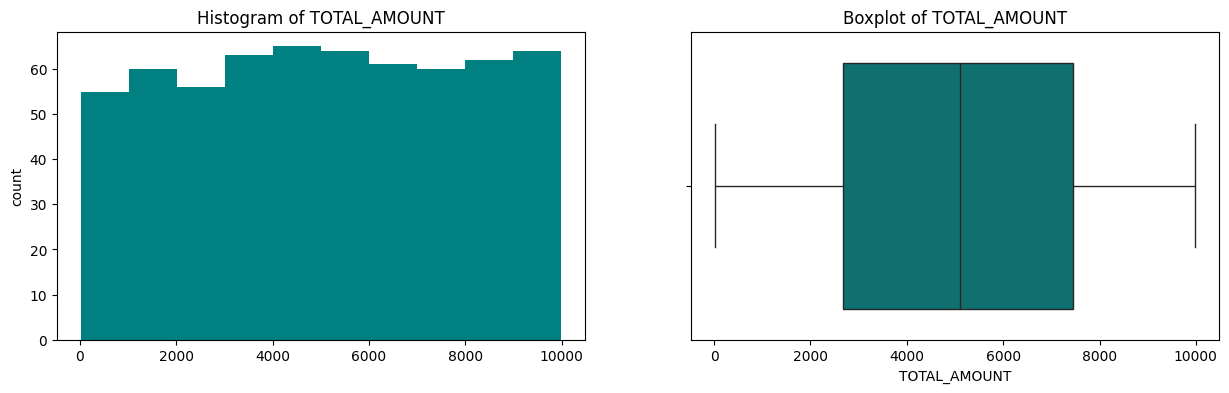

ORDER_DATE
Distribution by month:


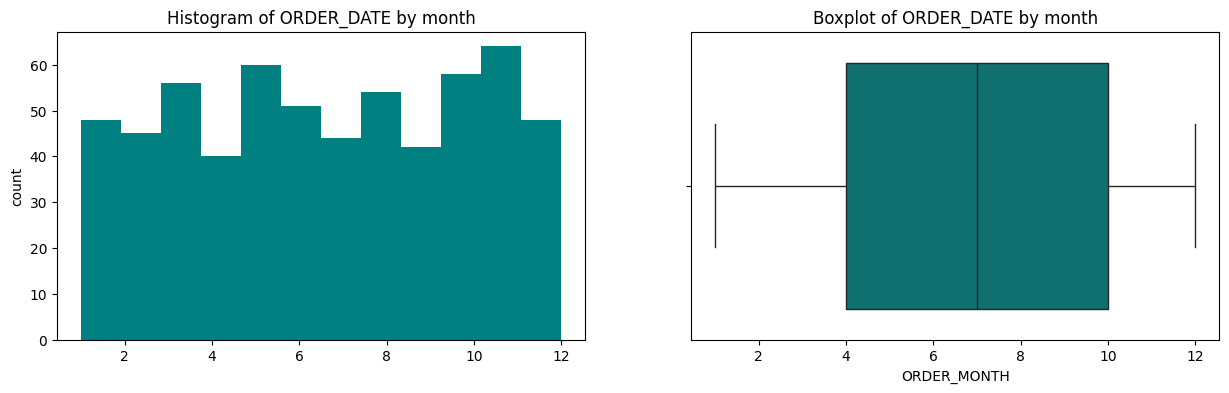

In [95]:

# Convert ORDER_DATE to datetime
orders['ORDER_DATE'] = pd.to_datetime(orders['ORDER_DATE'])

# Define the specific columns you want to analyze
columns_to_iterate = ['TOTAL_AMOUNT', 'ORDER_DATE']

for col in columns_to_iterate:
    print(col)
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(orders[col]):
        print('Skew :', round(orders[col].skew(), 2))
        
        plt.figure(figsize=(15, 4))
        
        plt.subplot(1, 2, 1)
        plt.hist(orders[col], bins=10)
        plt.ylabel('count')
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=orders[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()
    elif pd.api.types.is_datetime64_any_dtype(orders[col]):
        # If the column is a datetime, analyze the distribution by month
        orders['ORDER_MONTH'] = orders[col].dt.month
        print('Distribution by month:')
        
        plt.figure(figsize=(15, 4))
        
        plt.subplot(1, 2, 1)
        plt.hist(orders['ORDER_MONTH'], bins=12)
        plt.ylabel('count')
        plt.title(f'Histogram of {col} by month')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=orders['ORDER_MONTH'])
        plt.title(f'Boxplot of {col} by month')
        
        plt.show()
    else:
        print(f"Skipping non-numeric and non-datetime column: {col}")


TOTAL_AMOUNT
Skew : -0.01


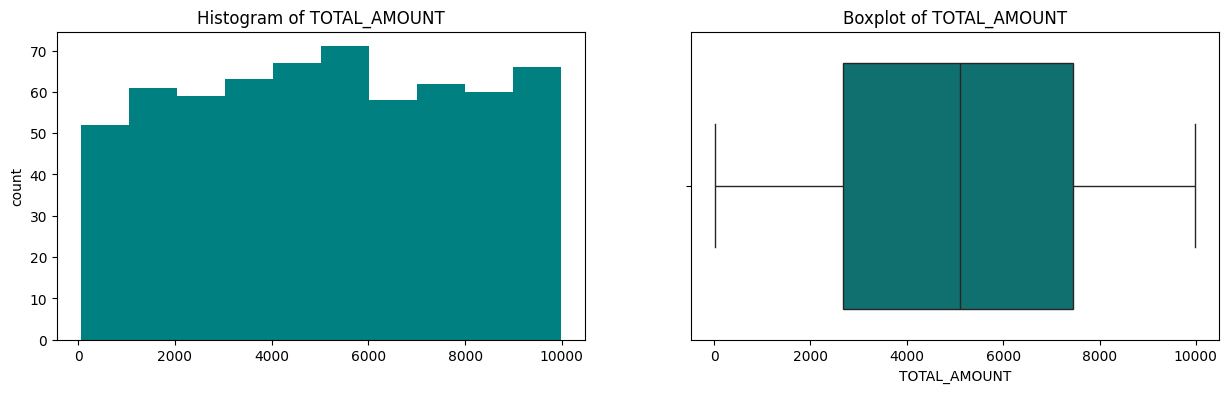

PAYMENT_DATE
Skipping non-numeric and non-datetime column: PAYMENT_DATE


In [114]:
# Define the specific columns you want to analyze
columns_to_iterate = ['TOTAL_AMOUNT', 'PAYMENT_DATE']

for col in columns_to_iterate:
    print(col)
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(payments_orders[col]):
        print('Skew :', round(payments_orders[col].skew(), 2))
        
        plt.figure(figsize=(15, 4))
        
        plt.subplot(1, 2, 1)
        plt.hist(payments_orders[col], bins=10)
        plt.ylabel('count')
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=orders[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()
    else:
        print(f"Skipping non-numeric and non-datetime column: {col}")

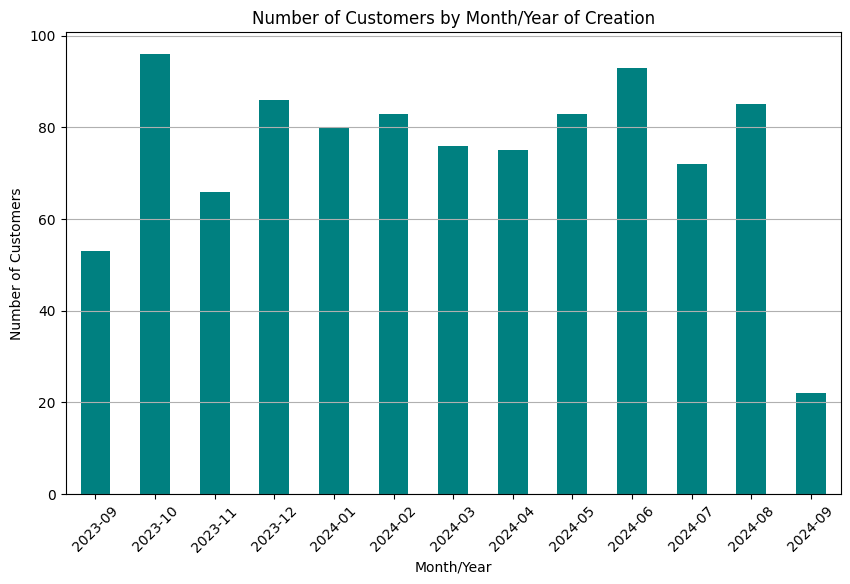

In [51]:
# Convert CREATED_AT to datetime
customers_df['CREATED_AT'] = pd.to_datetime(customers['CREATED_AT'])

# Extract month and year from CREATED_AT
customers_df['CREATED_MONTH_YEAR'] = customers['CREATED_AT'].dt.to_period('M')

# Count customers by CREATED_MONTH_YEAR and sort by index to ensure chronological order
customer_counts = customers_df['CREATED_MONTH_YEAR'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
customer_counts.plot(kind='bar')
plt.title('Number of Customers by Month/Year of Creation')
plt.xlabel('Month/Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Summary Statistics for Product Prices:
count    990.000000
mean      28.078596
std       15.037759
min        2.210000
25%       15.162500
50%       27.500000
75%       40.725000
max       54.990000
Name: PRICE, dtype: float64


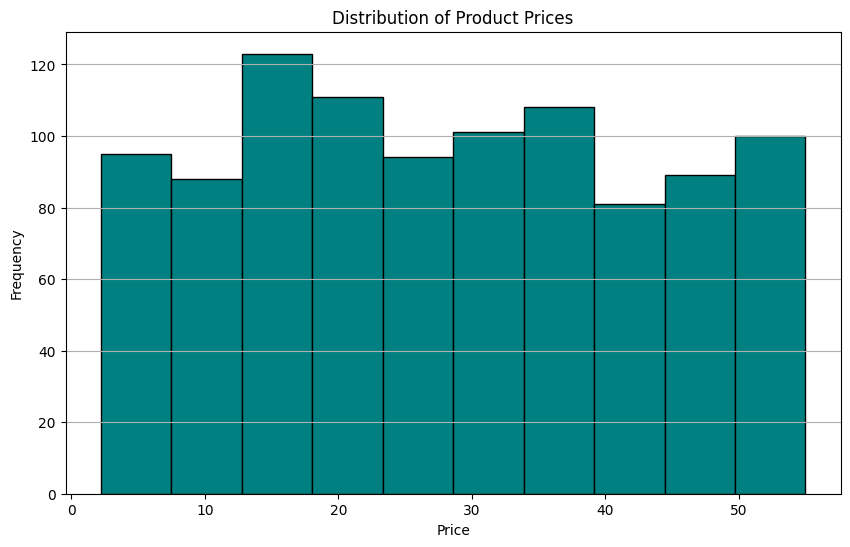

In [115]:
# Generate summary statistics for the price column
price_summary = products['PRICE'].describe()

# Print summary statistics
print("Summary Statistics for Product Prices:")
print(price_summary)

# Plotting the histogram for product prices
plt.figure(figsize=(10, 6))
plt.hist(products_df['PRICE'], bins=10, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Summary Statistics for Payment Amounts:
count     600.000000
mean     4948.684383
std      2890.573349
min        35.210000
25%      2468.672500
50%      4905.940000
75%      7404.762500
max      9993.130000
Name: AMOUNT, dtype: float64


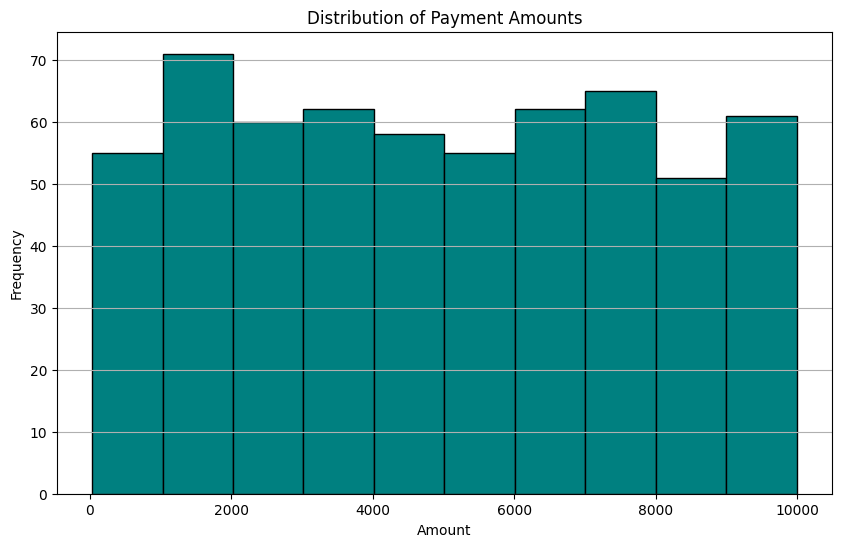

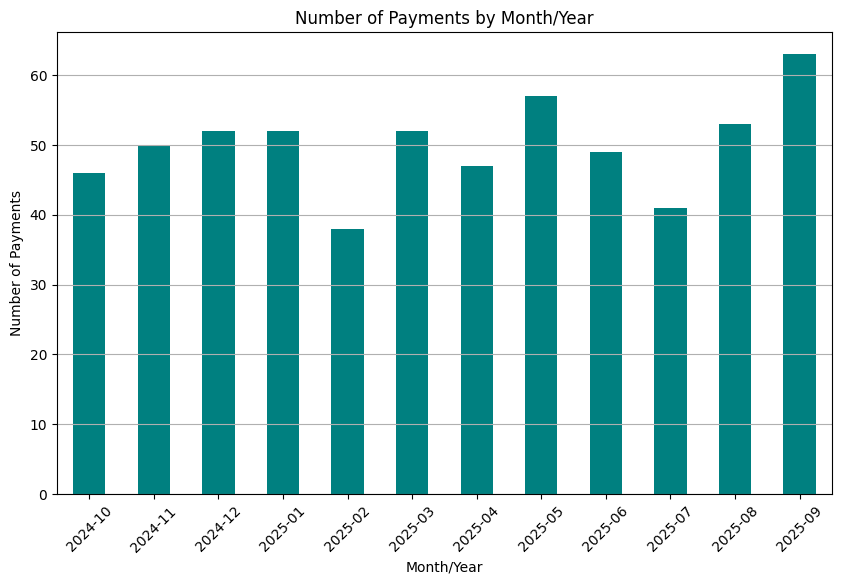

In [50]:
# Convert PAYMENT_DATE to datetime
payments_df['PAYMENT_DATE'] = pd.to_datetime(payments_df['PAYMENT_DATE'])

# Generate summary statistics for the amount column
amount_summary = payments_df['AMOUNT'].describe()

# Print summary statistics
print("Summary Statistics for Payment Amounts:")
print(amount_summary)

# Extract month and year from PAYMENT_DATE
payments_df['PAYMENT_MONTH_YEAR'] = payments_df['PAYMENT_DATE'].dt.to_period('M')

# Count payments by PAYMENT_MONTH_YEAR and sort by index to ensure chronological order
payment_counts = payments_df['PAYMENT_MONTH_YEAR'].value_counts().sort_index()

# Plotting the histogram for payment amounts
plt.figure(figsize=(10, 6))
plt.hist(payments_df['AMOUNT'], bins=10, edgecolor='black')
plt.title('Distribution of Payment Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Plotting the bar chart for payments by month/year
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar')
plt.title('Number of Payments by Month/Year')
plt.xlabel('Month/Year')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Summary Statistics for Order Total Amounts:
count     602.000000
mean     5137.620880
std      2854.019271
min        19.620000
25%      2710.907500
50%      5218.490000
75%      7475.695000
max      9989.910000
Name: TOTAL_AMOUNT, dtype: float64


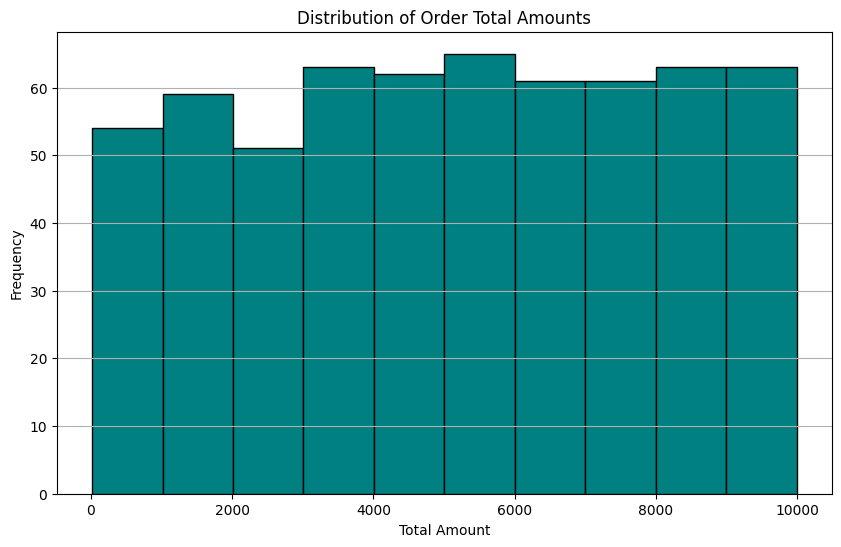

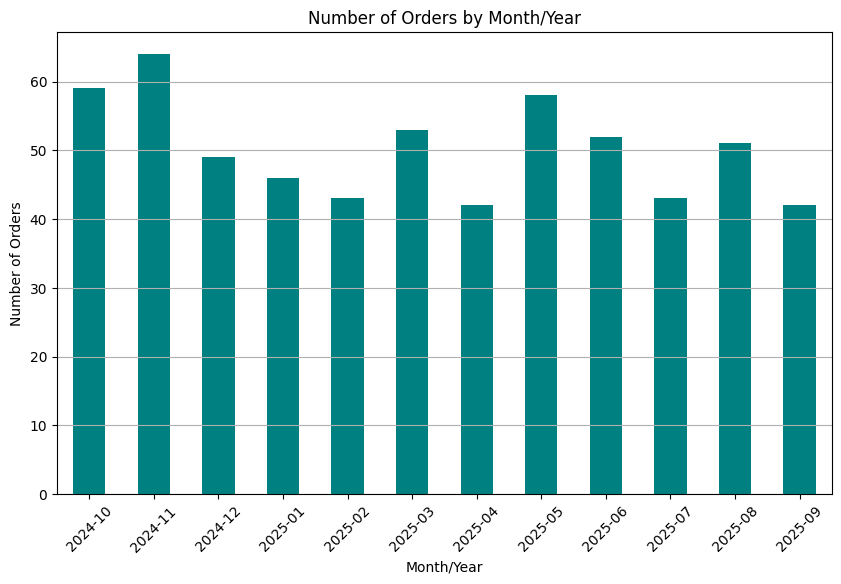

In [52]:
# Convert ORDER_DATE to datetime
orders_df['ORDER_DATE'] = pd.to_datetime(orders_df['ORDER_DATE'])

# Generate summary statistics for the total_amount column
total_amount_summary = orders_df['TOTAL_AMOUNT'].describe()

# Print summary statistics
print("Summary Statistics for Order Total Amounts:")
print(total_amount_summary)

# Extract month and year from ORDER_DATE
orders_df['ORDER_MONTH_YEAR'] = orders_df['ORDER_DATE'].dt.to_period('M')

# Count orders by ORDER_MONTH_YEAR and sort by index to ensure chronological order
order_counts = orders_df['ORDER_MONTH_YEAR'].value_counts().sort_index()

# Plotting the histogram for total amounts
plt.figure(figsize=(10, 6))
plt.hist(orders_df['TOTAL_AMOUNT'], bins=10, edgecolor='black')
plt.title('Distribution of Order Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Plotting the bar chart for orders by month/year
plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar')
plt.title('Number of Orders by Month/Year')
plt.xlabel('Month/Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [118]:
orders_df['PRODUCT_ID'] = orders_df['ORDER_ID'] % 5 + 1  # This is a placeholder mapping

# Merge orders with products to get product details
order_product_details = pd.merge(orders, products, on='PRODUCT_ID')

# Calculate total quantity sold for each product
product_quantity_sold = order_product_details['PRODUCT_NAME'].value_counts()

# Calculate total profit for each product (assuming TOTAL_AMOUNT is the revenue)
product_profit = order_product_details.groupby('PRODUCT_NAME')['TOTAL_AMOUNT'].sum()

# Display the prepared data
print(product_quantity_sold)
print(product_profit)

ERROR - Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_786/3088648561.py", line 4, in <module>
    order_product_details = pd.merge(orders, products, on='PRODUCT_ID')
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 148, in merge
    op = _MergeOperation(
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 737, in __init__
    ) = self._get_merge_keys()
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 1221, in _get_merge_keys
    left_keys.append(left._get_label_or_level_values(lk))
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py", line 1778, in _get_label_or_level_values
    raise KeyError(key)
KeyError: 'PRODUCT_ID'
KeyError: 'PRODUCT_ID'

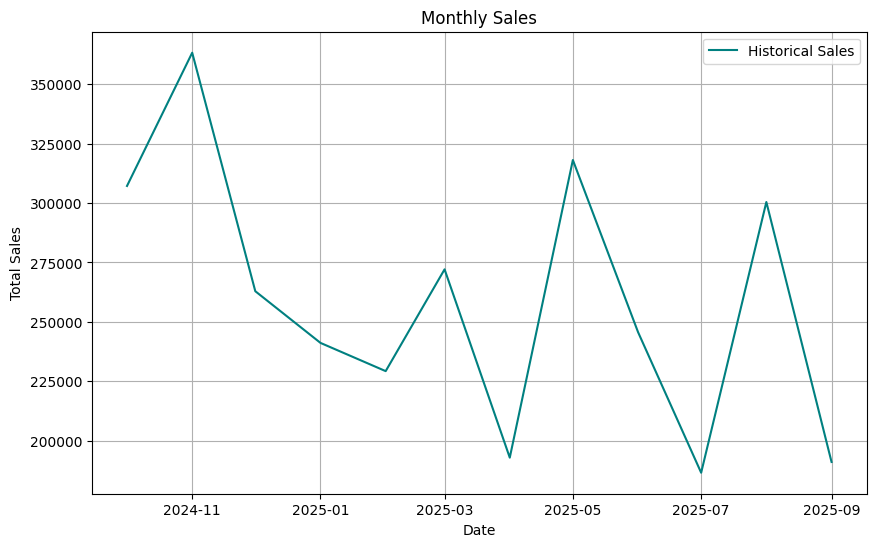

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


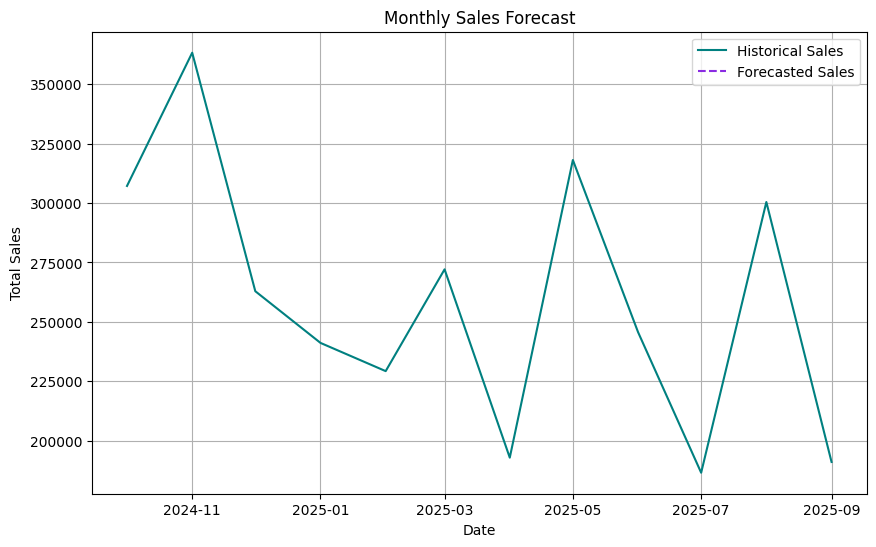

In [117]:
# Convert ORDER_DATE to datetime
orders['ORDER_DATE'] = pd.to_datetime(orders['ORDER_DATE'])

# Aggregate total amount by month
orders['ORDER_MONTH'] = orders['ORDER_DATE'].dt.to_period('M')
monthly_sales = orders.groupby('ORDER_MONTH')['TOTAL_AMOUNT'].sum()

# Convert to a time series
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

# Fit the SARIMAX model
model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast future sales
forecast_steps = 12  # Forecast for the next 12 months
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', linestyle='--')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()